### Load and Merge Models

In [103]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model, clone_model

# Load all 6 local models
model_1 = load_model("models\lmodel_Cyn.keras")
model_2 = load_model("models\lmodel_David_G.keras")
model_3 = load_model("models\lmodel_Kev.keras")
model_4 = load_model("models\lmodel_Luis.keras")
model_5 = load_model("models\lmodel_Vivi.keras")
model_6 = load_model("models\lmodel_Yuu.keras")

# Merge all 6 models using weighted interpolation.
alpha = 0.6 # More weight is given to the a single model to provide stability and prevent colapse.
merged_weights = [
    alpha * w1 + (1 - alpha) * np.mean([w2, w3, w4, w5, w6], axis=0)
    for w1, w2, w3, w4, w5, w6 in zip(model_1.get_weights(), model_2.get_weights(), model_3.get_weights(), model_4.get_weights(), model_5.get_weights(), model_6.get_weights())
]

# The global model is copied from the first (all have the same architecture) and its weights are modified.
global_model = clone_model(model_1)
global_model.set_weights(merged_weights)

global_model.save("global_model.keras")

### Load Test Data and Merged Models

In [104]:
# Load test data
X_test = np.loadtxt('x_test_fed.csv', delimiter=',')
y_test = np.loadtxt('y_test_fed.csv', delimiter=',')

n_samples = X_test.shape[0]
height, width = 28, 28

X_test = X_test.reshape(n_samples, height, width)

In [105]:
# Load global model
from tensorflow.keras.models import load_model

model = load_model("merged_model.keras")

### Evaluate the Model

In [106]:
# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


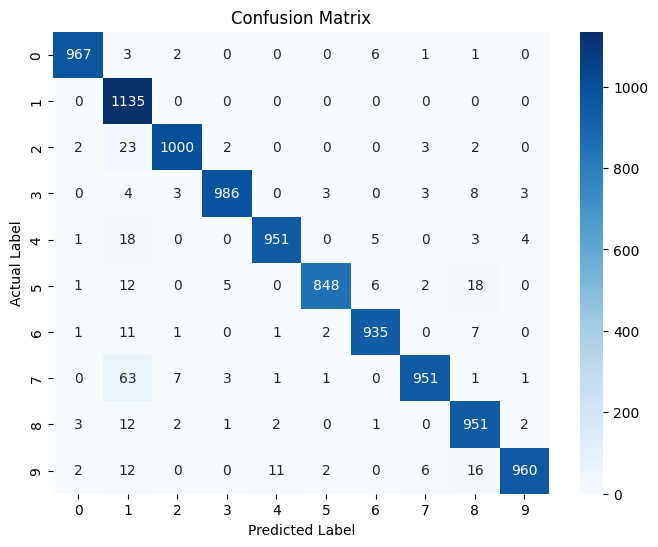

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix")
plt.show()

In [108]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       980
         1.0       0.88      1.00      0.93      1135
         2.0       0.99      0.97      0.98      1032
         3.0       0.99      0.98      0.98      1010
         4.0       0.98      0.97      0.98       982
         5.0       0.99      0.95      0.97       892
         6.0       0.98      0.98      0.98       958
         7.0       0.98      0.93      0.95      1028
         8.0       0.94      0.98      0.96       974
         9.0       0.99      0.95      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

